In [94]:
# Import required libraries
import pandas as pd
import numpy as np
import os
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [95]:
# Define paths - UPDATE THESE TO YOUR ABCD DATA LOCATION
ABCD_DATA_PATH = "/Users/chloehampson/Desktop/hippo-amyg-depression/dset"  # UPDATE THIS PATH
OUTPUT_DIR = "/Users/chloehampson/Desktop/hippo-amyg-depression/derivatives"

# Create output directory if it doesn't exist
os.makedirs(OUTPUT_DIR, exist_ok=True)

print(f"Output directory: {OUTPUT_DIR}")

Output directory: /Users/chloehampson/Desktop/hippo-amyg-depression/derivatives


## 1. Load Data

Load the pre-prepared CSV files containing all necessary data.

In [96]:
# Load all data files
print("Loading data files...")

# Load demographics/covariates
demographics_df = pd.read_csv(os.path.join(ABCD_DATA_PATH, 'demographics.csv'))
print(f"Demographics loaded: {demographics_df.shape}")

# Load socioenvironmental data
socioenv_df = pd.read_csv(os.path.join(ABCD_DATA_PATH, 'socioenvironment.csv'))
print(f"Socioenvironmental loaded: {socioenv_df.shape}")

# Load depression data
depression_df = pd.read_csv(os.path.join(ABCD_DATA_PATH, 'depression.csv'))
print(f"Depression loaded: {depression_df.shape}")

# Load brain/task-FC data
brain_df = pd.read_csv(os.path.join(ABCD_DATA_PATH, 'task-FC.csv'))
print(f"Brain/task-FC loaded: {brain_df.shape}")

print("\nAll data files loaded successfully!")

Loading data files...
Demographics loaded: (68190, 9)
Socioenvironmental loaded: (68145, 17)
Depression loaded: (68042, 10)
Brain/task-FC loaded: (26329, 6)

All data files loaded successfully!


---

## 2. Define Variables

Define the variable lists for each analysis block.

In [97]:
# Subject identifier
SUBJECT_ID = 'participant_id'
SESSION_ID = 'session_id'

# Covariate variables for residualization
COVARIATES = {
    'age': 'ab_p_demo_age',
    'sex': 'ab_g_stc__cohort_sex',
    'ethnicity': 'ab_g_stc__cohort_ethnrace__meim',
    'race': 'ab_g_stc__cohort_race__nih',
    'site': 'ab_g_dyn__design_site',
    'family_id': 'ab_g_stc__design_id__fam',
}

print(f"Covariates defined: {len(COVARIATES)}")

Covariates defined: 6


In [98]:
# Family Environment
FAMILY_ENV_VARS = [
    'fc_p_fes__cohes_mean',      # Family cohesion
    'fc_p_fes__confl_mean',      # Family conflict
    'fc_p_fes__expr_mean',       # Family expression
    'fc_p_fes__intelcult_mean',  # Intellectual/cultural orientation
    'fc_p_fes__org_mean',        # Family organization
    'fc_p_fes__rec_mean',        # Active-recreational orientation
]

# Cultural & Social Environment
CULTURAL_SOCIAL_VARS = [
    'fc_y_meim_mean',                          # MEIM Youth
    'fc_p_meim_mean',                          # MEIM Parent
    'le_l_nbhsoc__addr1__factor3_score',       # Neighborhood ethnic/immigrant
    'fc_y_srpf__env_mean',                     # School environment
]

# Socioeconomic Status
SES_VARS = [
    'le_l_nbhsoc__addr1__factor1_score',       # Neighborhood disadvantage
    'le_l_nbhsoc__addr1__aff_score',           # Neighborhood affluence
    'le_l_coi__addr1__coi__total__metro_score',# Child Opportunity Index
    'ab_p_demo__income__hhold_001',            # Household income
    'ab_g_dyn__cohort_edu__cgs',               # Caregiver education
]

# Combine all socioenvironmental variables
SOCIOENV_VARS = FAMILY_ENV_VARS + CULTURAL_SOCIAL_VARS + SES_VARS

print(f"Total SOCIOENVIRONMENTAL variables: {len(SOCIOENV_VARS)}")
print(f"  Family Environment: {len(FAMILY_ENV_VARS)}")
print(f"  Cultural/Social: {len(CULTURAL_SOCIAL_VARS)}")
print(f"  SES: {len(SES_VARS)}")

Total SOCIOENVIRONMENTAL variables: 15
  Family Environment: 6
  Cultural/Social: 4
  SES: 5


In [99]:
DEPRESSION_VARS = [
    # Summary scores
    'mh_p_cbcl__dsm__dep_sum',      # CBCL Depression (Parent)
    'mh_y_ysr__dsm__dep_sum',       # YSR Depression (Youth)
    
    # Core symptoms - Parent report
    'mh_p_ksads__dep__mood__pres_sx',   # Depressed mood (Parent)
    'mh_p_ksads__dep__anhed__pres_sx',  # Anhedonia (Parent)
    'mh_p_ksads__dep__fatig__pres_sx',  # Fatigue (Parent)
    
    # Core symptoms - Youth report
    'mh_y_ksads__dep__mood__pres_sx',   # Depressed mood (Youth)
    'mh_y_ksads__dep__anhed__pres_sx',  # Anhedonia (Youth)
    'mh_y_ksads__dep__fatig__pres_sx',  # Fatigue (Youth)
]

print(f"Total DEPRESSION variables: {len(DEPRESSION_VARS)}")

Total DEPRESSION variables: 8


In [100]:
# Hippocampus ROIs
HIPPOCAMPUS_VARS = [
    'mr_y_tfmri__nback__2bv0b__aseg__hc__lh_beta',
    'mr_y_tfmri__nback__2bv0b__aseg__hc__rh_beta',  # Hippocampus Left and Right

]

# Amygdala ROIs
AMYGDALA_VARS = [
    'mr_y_tfmri__nback__emovntf__aseg__ag__lh_beta',
    'mr_y_tfmri__nback__emovntf__aseg__ag__rh_beta'
]

BRAIN_VARS = HIPPOCAMPUS_VARS + AMYGDALA_VARS

print(f"Total BRAIN variables: {len(BRAIN_VARS)}")
print(f"  Hippocampus: {len(HIPPOCAMPUS_VARS)}")
print(f"  Amygdala: {len(AMYGDALA_VARS)}")

Total BRAIN variables: 4
  Hippocampus: 2
  Amygdala: 2


---

## 3. Remove Missing Data

Going through each variable list and removing particpants with missing data.

Calculating missing data percentages...



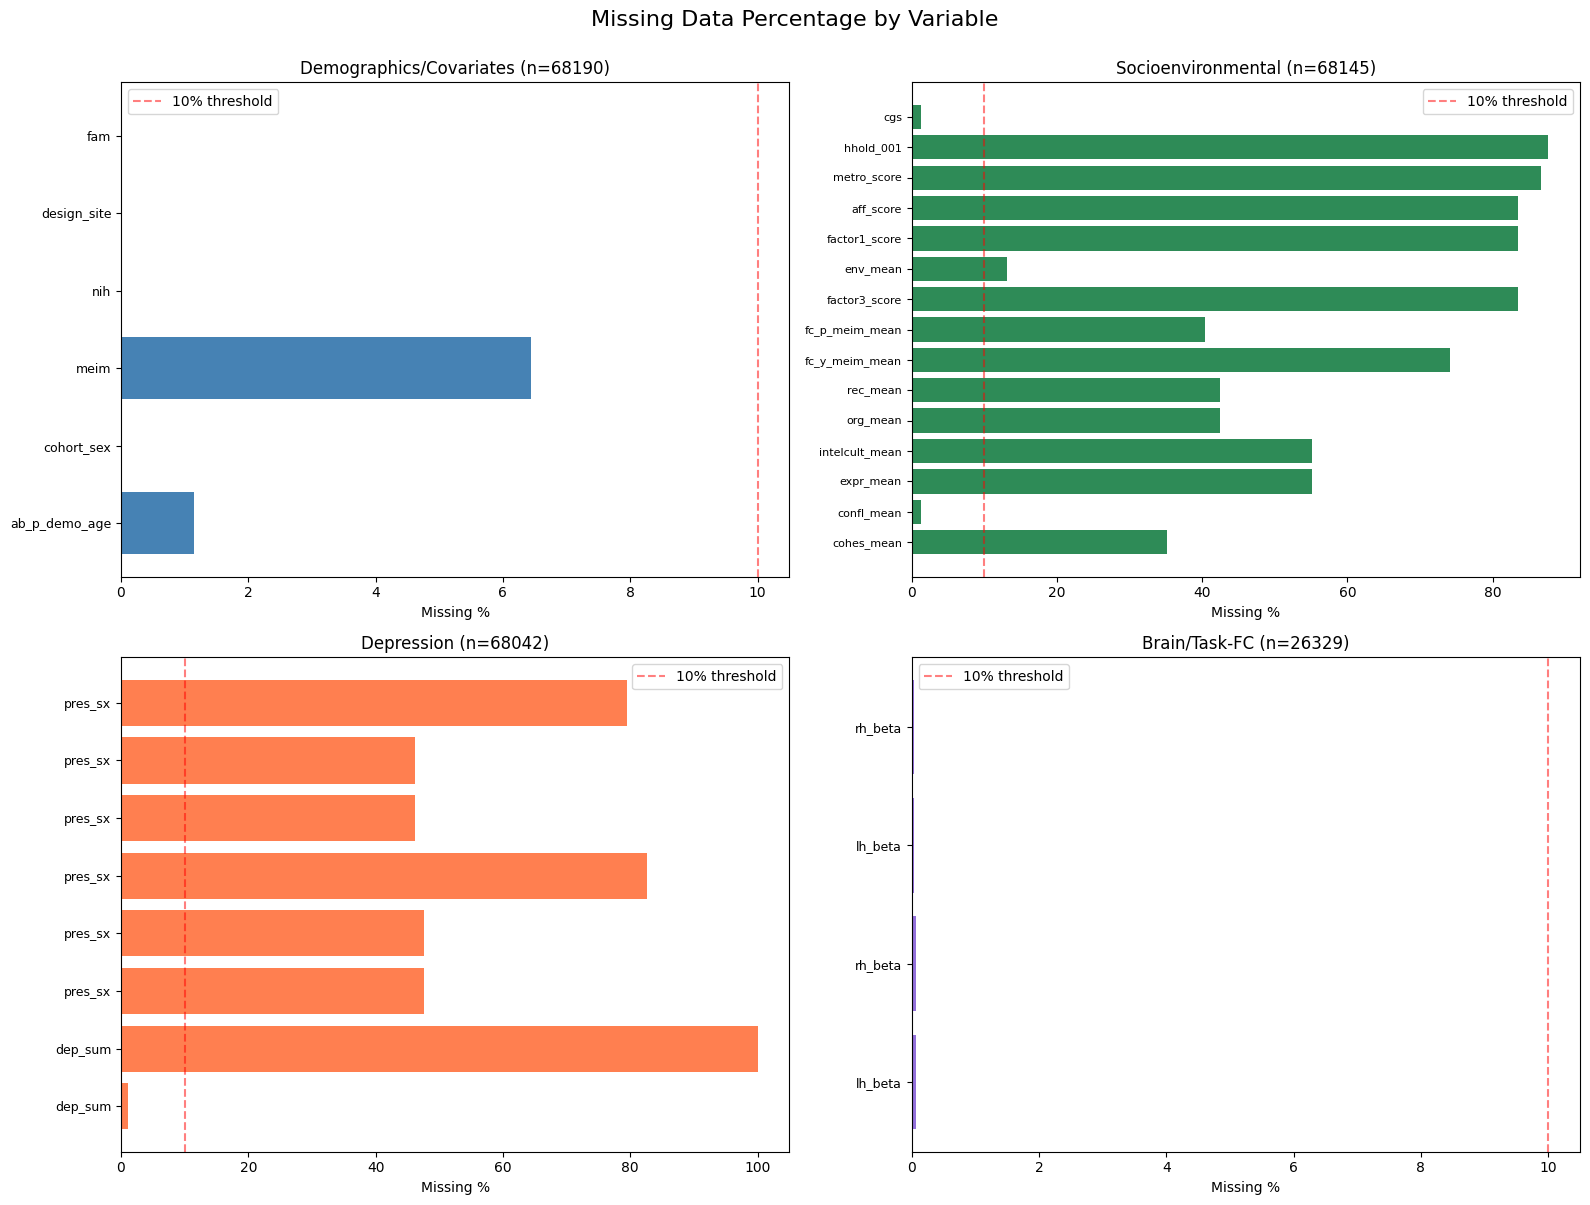


=== MISSING DATA SUMMARY ===

Demographics/Covariates:
  Mean missing: 1.27%
  Max missing: 6.45%

Socioenvironmental:
  Mean missing: 52.38%
  Max missing: 87.65%

Depression:
  Mean missing: 56.38%
  Max missing: 100.00%

Brain/Task-FC:
  Mean missing: 0.06%
  Max missing: 0.07%


In [ ]:
import matplotlib.pyplot as plt

# Calculate missing data percentages for each variable set
def calc_missing_pct(df, var_list):
    """Calculate percentage of missing data for each variable"""
    missing_pct = {}
    for var in var_list:
        if var in df.columns:
            missing_pct[var] = (df[var].isna().sum() / len(df)) * 100
        else:
            missing_pct[var] = None  # Variable not found
    return missing_pct

# Calculate for all variable sets
print("Calculating missing data percentages...\n")

covariate_cols = list(COVARIATES.values())
demo_missing = calc_missing_pct(demographics_df, covariate_cols)
socioenv_missing = calc_missing_pct(socioenv_df, SOCIOENV_VARS)
depression_missing = calc_missing_pct(depression_df, DEPRESSION_VARS)
brain_missing = calc_missing_pct(brain_df, BRAIN_VARS)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Missing Data Percentage by Variable', fontsize=16, y=1.00)

# Demographics/Covariates
ax1 = axes[0, 0]
vars1 = [k for k, v in demo_missing.items() if v is not None]
pcts1 = [v for v in demo_missing.values() if v is not None]
ax1.barh(range(len(vars1)), pcts1, color='steelblue')
ax1.set_yticks(range(len(vars1)))
ax1.set_yticklabels(vars1, fontsize=7)
ax1.set_xlabel('Missing %')
ax1.set_title(f'Demographics/Covariates (n={len(demographics_df)})')
ax1.axvline(x=10, color='red', linestyle='--', alpha=0.5, label='10% threshold')
ax1.legend()

# Socioenvironmental
ax2 = axes[0, 1]
vars2 = [k for k, v in socioenv_missing.items() if v is not None]
pcts2 = [v for v in socioenv_missing.values() if v is not None]
ax2.barh(range(len(vars2)), pcts2, color='seagreen')
ax2.set_yticks(range(len(vars2)))
ax2.set_yticklabels(vars2, fontsize=6)
ax2.set_xlabel('Missing %')
ax2.set_title(f'Socioenvironmental (n={len(socioenv_df)})')
ax2.axvline(x=10, color='red', linestyle='--', alpha=0.5, label='10% threshold')
ax2.legend()

# Depression
ax3 = axes[1, 0]
vars3 = [k for k, v in depression_missing.items() if v is not None]
pcts3 = [v for v in depression_missing.values() if v is not None]
ax3.barh(range(len(vars3)), pcts3, color='coral')
ax3.set_yticks(range(len(vars3)))
ax3.set_yticklabels(vars3, fontsize=7)
ax3.set_xlabel('Missing %')
ax3.set_title(f'Depression (n={len(depression_df)})')
ax3.axvline(x=10, color='red', linestyle='--', alpha=0.5, label='10% threshold')
ax3.legend()

# Brain
ax4 = axes[1, 1]
vars4 = [k for k, v in brain_missing.items() if v is not None]
pcts4 = [v for v in brain_missing.values() if v is not None]
ax4.barh(range(len(vars4)), pcts4, color='mediumpurple')
ax4.set_yticks(range(len(vars4)))
ax4.set_yticklabels(vars4, fontsize=7)
ax4.set_xlabel('Missing %')
ax4.set_title(f'Brain/Task-FC (n={len(brain_df)})')
ax4.axvline(x=10, color='red', linestyle='--', alpha=0.5, label='10% threshold')
ax4.legend()

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n=== MISSING DATA SUMMARY ===")
print(f"\nDemographics/Covariates:")
print(f"  Mean missing: {np.mean(pcts1):.2f}%")
print(f"  Max missing: {np.max(pcts1):.2f}%")

print(f"\nSocioenvironmental:")
print(f"  Mean missing: {np.mean(pcts2):.2f}%")
print(f"  Max missing: {np.max(pcts2):.2f}%")

print(f"\nDepression:")
print(f"  Mean missing: {np.mean(pcts3):.2f}%")
print(f"  Max missing: {np.max(pcts3):.2f}%")

print(f"\nBrain/Task-FC:")
print(f"  Mean missing: {np.mean(pcts4):.2f}%")
print(f"  Max missing: {np.max(pcts4):.2f}%")

In [102]:
# Remove rows with missing data for each dataframe
print("Removing rows with missing data...\n")

# Demographics/Covariates
print(f"Demographics - Before: {len(demographics_df)} rows")
covariate_cols = list(COVARIATES.values())
demographics_clean = demographics_df.dropna(subset=covariate_cols)
print(f"Demographics - After: {len(demographics_clean)} rows ({len(demographics_df) - len(demographics_clean)} removed)\n")

# Socioenvironmental
print(f"Socioenvironmental - Before: {len(socioenv_df)} rows")
socioenv_clean = socioenv_df.dropna(subset=SOCIOENV_VARS)
print(f"Socioenvironmental - After: {len(socioenv_clean)} rows ({len(socioenv_df) - len(socioenv_clean)} removed)\n")

# Depression
print(f"Depression - Before: {len(depression_df)} rows")
depression_clean = depression_df.dropna(subset=DEPRESSION_VARS)
print(f"Depression - After: {len(depression_clean)} rows ({len(depression_df) - len(depression_clean)} removed)\n")

# Brain/task-FC
print(f"Brain - Before: {len(brain_df)} rows")
brain_clean = brain_df.dropna(subset=BRAIN_VARS)
print(f"Brain - After: {len(brain_clean)} rows ({len(brain_df) - len(brain_clean)} removed)\n")

# Update the original dataframes
demographics_df = demographics_clean
socioenv_df = socioenv_clean
depression_df = depression_clean
brain_df = brain_clean

print("✓ Missing data removed from all dataframes")

Removing rows with missing data...

Demographics - Before: 68190 rows
Demographics - After: 63057 rows (5133 removed)

Socioenvironmental - Before: 68145 rows
Socioenvironmental - After: 0 rows (68145 removed)

Depression - Before: 68042 rows
Depression - After: 0 rows (68042 removed)

Brain - Before: 26329 rows
Brain - After: 26298 rows (31 removed)

✓ Missing data removed from all dataframes


---

## 3. Filter Subjects

Figuring out what time point gives us the most useful data.

In [103]:
# Find participants that appear in all 4 dataframes
print("Finding common participants across all dataframes...\n")

# Get unique participant IDs from each dataframe
demo_ids = set(demographics_df[SUBJECT_ID].unique())
socioenv_ids = set(socioenv_df[SUBJECT_ID].unique())
depression_ids = set(depression_df[SUBJECT_ID].unique())
brain_ids = set(brain_df[SUBJECT_ID].unique())

print(f"Demographics: {len(demo_ids)} unique participants")
print(f"Socioenvironmental: {len(socioenv_ids)} unique participants")
print(f"Depression: {len(depression_ids)} unique participants")
print(f"Brain: {len(brain_ids)} unique participants\n")

# Find intersection (participants present in ALL dataframes)
common_ids = demo_ids & socioenv_ids & depression_ids & brain_ids
print(f"Common participants across all 4 dataframes: {len(common_ids)}\n")

# Filter each dataframe to only include common participants
print("Filtering dataframes to common participants...")
demographics_df = demographics_df[demographics_df[SUBJECT_ID].isin(common_ids)]
socioenv_df = socioenv_df[socioenv_df[SUBJECT_ID].isin(common_ids)]
depression_df = depression_df[depression_df[SUBJECT_ID].isin(common_ids)]
brain_df = brain_df[brain_df[SUBJECT_ID].isin(common_ids)]

print(f"Demographics filtered: {len(demographics_df)} rows")
print(f"Socioenvironmental filtered: {len(socioenv_df)} rows")
print(f"Depression filtered: {len(depression_df)} rows")
print(f"Brain filtered: {len(brain_df)} rows")
print("\n✓ All dataframes filtered to common participants")

Finding common participants across all dataframes...

Demographics: 11053 unique participants
Socioenvironmental: 0 unique participants
Depression: 0 unique participants
Brain: 11181 unique participants

Common participants across all 4 dataframes: 0

Filtering dataframes to common participants...
Demographics filtered: 0 rows
Socioenvironmental filtered: 0 rows
Depression filtered: 0 rows
Brain filtered: 0 rows

✓ All dataframes filtered to common participants
